In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import load_preprocessed_file,get_monthly_averages,\
                  compute_anomalies, plot_anomaly_graph

In [2]:
BUOYNO=46026
df=load_preprocessed_file(BUOYNO)
df = df[df.index.map(lambda x:x.year)!=1982] # drop 1982, which has no data
df.head(6)

,ATMP,WTMP
timestamp,,
1983-01-01 01:00:00,9.3,11.5
1983-01-01 02:00:00,9.1,12.1
1983-01-01 03:00:00,8.9,12.1
1983-01-01 04:00:00,8.7,11.8
1983-01-01 05:00:00,8.5,11.5
1983-01-01 06:00:00,8.6,11.4


In [3]:
monthly=get_monthly_averages(df)
monthly.head()

,ATMP,WTMP
1983-01,10.505177,12.018963
1983-02,12.561596,13.121386
1983-03,12.480894,13.543284
1983-04,11.979690,12.663173
1983-05,12.047497,13.153045


In [4]:
all_months_air = compute_anomalies(monthly, 'ATMP')
all_months_air.head()


,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,-0.484877,NaN,NaN,1.003952,-0.282152,-0.028220,-1.690726,0.023253,-0.969001,-1.076775,...,-0.747588,0.236955,NaN,-0.668831,-0.279407,-0.501044,0.530327,1.936341,1.189649,-0.237216
Feb,1.190548,-0.144381,-0.473263,1.182437,0.697665,0.401780,-2.949257,-1.927700,-0.477186,1.316452,...,-1.057724,-0.232715,0.466420,NaN,-1.049496,-1.597474,-0.037117,2.216039,1.477867,0.418803
Mar,1.172064,0.526319,-1.659101,1.368704,0.374968,-0.362334,-0.586368,-1.351668,-1.074241,1.742676,...,-1.132809,-0.809379,0.246072,NaN,-1.679720,-1.624455,0.754647,1.317989,1.263565,0.629091
Apr,0.897773,-0.751567,-0.565670,-0.103116,0.249316,0.402817,1.081161,0.524685,-0.631010,2.000674,...,-1.389339,-1.164965,-0.005685,NaN,-0.423166,-1.138301,0.137795,-0.093401,1.055775,0.604574
May,0.744912,-0.477415,-0.603933,-0.495268,0.803606,-0.001389,0.092544,0.058511,-1.316026,1.574316,...,-0.838319,-0.866801,-0.876398,-0.583835,-1.168668,-0.316910,0.398222,-0.042720,0.623063,-0.345984


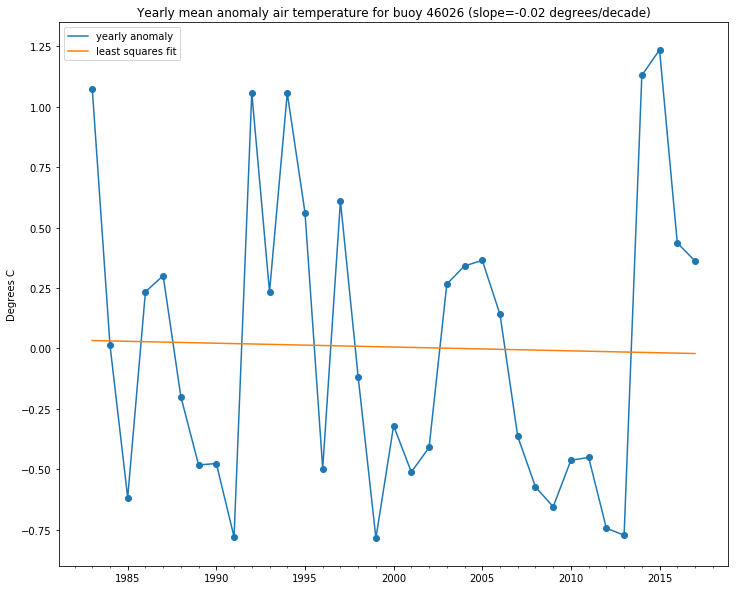

In [5]:
air_slope = plot_anomaly_graph(BUOYNO, 'air', all_months_air)


In [6]:
all_months_water = compute_anomalies(monthly, 'WTMP')
all_months_water.head()

,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,0.486322,NaN,NaN,0.713345,0.529381,-0.601937,-1.685867,0.257278,-1.129402,0.004622,...,-0.535244,-0.602170,NaN,-0.417533,-0.438706,-0.577146,NaN,1.572801,1.480891,-0.184668
Feb,1.284171,0.373655,-0.387215,0.979452,0.173115,-0.478855,-2.093185,-1.462476,-0.378831,0.968668,...,-0.813789,-0.209184,0.932406,NaN,-1.183192,-1.497275,NaN,2.102875,1.114739,0.462935
Mar,1.681417,0.242629,-1.141948,1.574435,-0.004744,-0.635047,-0.687577,-1.387948,-0.638448,2.142517,...,-1.298242,-0.580934,0.374688,NaN,-1.911259,-1.569203,NaN,1.087999,1.205387,0.617621
Apr,1.417655,-0.718525,-0.131232,0.646114,0.482353,0.437909,1.356446,0.572881,-0.705350,2.161316,...,-1.638655,-1.634691,0.302598,NaN,-0.315240,-1.123997,NaN,-0.586974,0.559211,0.644594
May,1.933501,-0.918998,-0.023048,-0.142172,1.301183,-0.230141,0.005389,0.311689,-1.345619,2.168485,...,-1.018592,-0.809003,-1.173818,-0.598502,-1.193837,-0.507129,NaN,0.040051,0.793280,-0.043560


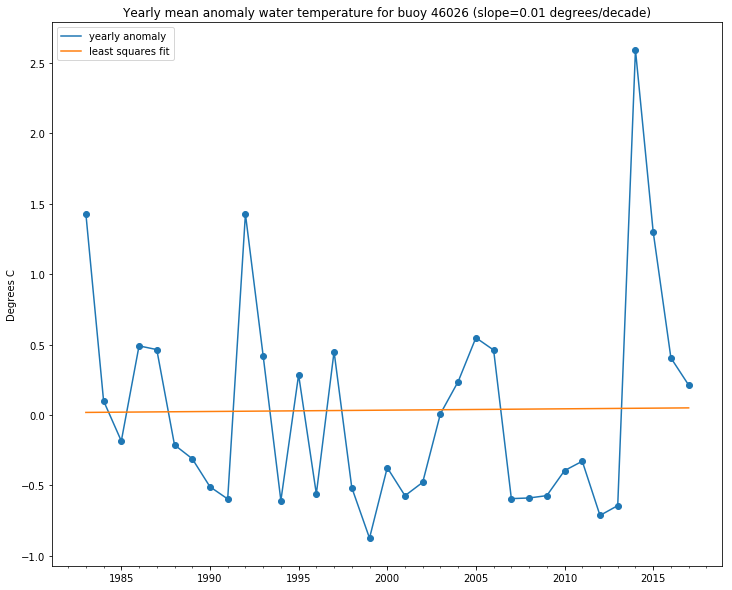

In [7]:
water_slope = plot_anomaly_graph(BUOYNO, 'water', all_months_water)


In [8]:
from dataworkspaces.kits.jupyter import NotebookLineageBuilder
with NotebookLineageBuilder('../results',
                            run_description="compute air and water anomaly for buoy %s" % BUOYNO)\
       .with_parameters({'buoy':BUOYNO})\
       .with_input_path('../intermediate-data/processed_%s.csv.gz'%BUOYNO)\
       .eval() as lineage:
    lineage.write_results({'air_slope':round(air_slope,3),
                          'water_slope':round(water_slope, 3),
                          'units':'degrees C per decade'})
print("Results:")
print("  Air slope:   %.3f degrees C per decade" % air_slope)
print("  Water slope: %.3f degrees C per decade" % water_slope)

Wrote results to results:results.json
Results:
  Air slope:   -0.016 degrees C per decade
  Water slope: 0.009 degrees C per decade
